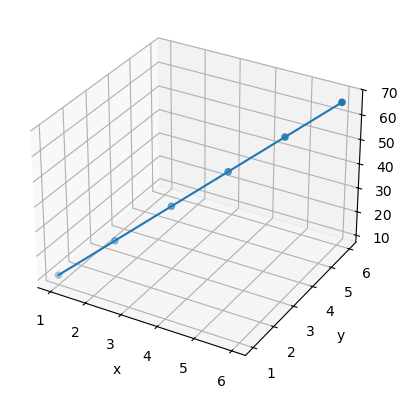

In [1]:
### 3D图像
### 散点图
import matplotlib.pyplot as plt
import numpy as np

## 3d图像必须导入3d坐标系
from mpl_toolkits.mplot3d import axes3d

plt.figure()
ax3d = plt.axes(projection='3d')

## 这里z为啥是二维?
## 比如
## X:
#  [1, 2, 3]
#  [4, 5, 6]
## Y:
#  [1, 2, 3]
#  [4, 5, 6]
##则XY组合形成的点阵,是个二维数组,记住,这是个二维点阵
# [(1,1), (2,2), (3,3)]
# [(4,4), (5,5), (6.6)]
##那么z值呢,必须要和点阵图形成1v1的映射,必然也是个二维数组
# [9,8,7]
# [6,5,4]
# 不要把它想成网格!!!
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[1, 2, 3], [4, 5, 6]])
z = np.array([[11, 22, 33], [44, 55, 66]])

## 也可以都是一维数组,(x,y,z)映射成点
# x = np.arange(10)
# y = np.arange(10)
# z = np.arange(10)

ax3d.scatter(x, y, z)
ax3d.plot(x, y, z)
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')

plt.show()


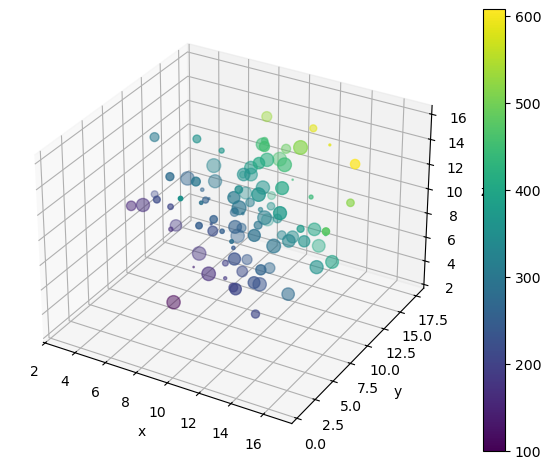

In [3]:
from mpl_toolkits.mplot3d import axes3d
# x= np.random.randint(1, 100, size=(10, 10))
# y= np.random.randint(1, 100, size=(10, 10))
# z = np.random.randint(1, 100, size=(10, 10))

x = np.random.normal(10, 3, size=(10, 10))
y = np.random.normal(10, 3, size=(10, 10))
z = np.random.normal(10, 3, size=(10, 10))

## 一维数组也是可以的
# x = np.random.normal(0, 1, 100)
# y = np.random.normal(0, 1, 100)
# z = np.random.normal(0, 1, 100)

# c = np.random.randint(1, 100, size=(10, 10))
s = np.random.randint(1, 100, size=(10, 10))
c = x**2 + y**2 + z**2

fig = plt.figure()
## 获取3维坐标系的方法
## 方法1:直接创建
ax3d = plt.axes(projection='3d')
## 方法2:fig添加,需要矩阵 [x,y,width,height]
# ax3d = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')
## 方法3
# ax3d = fig.add_subplot(111, projection='3d')
## 方法4
# ax3d = plt.subplot(111, projection='3d')
im = ax3d.scatter(
    x,
    y,
    z,
    s = s,
    # marker='*',
    # color='r',
    c = c,
    cmap = 'viridis',
)
## 这里传入im才能运行,3d图和2d不一样
plt.colorbar(im)
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')

plt.tight_layout()
plt.show()


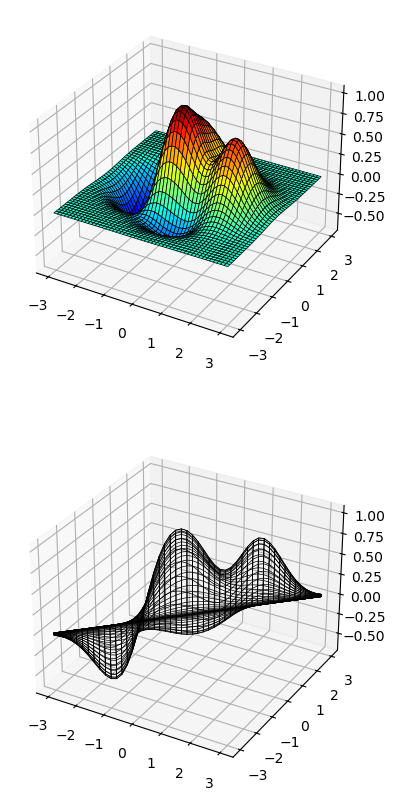

In [4]:
## 绘制3d曲面

n = 50
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
## 说一下meshgrid的作用,其实就是将x,y的坐标生成网格矩阵
## 也就是: x会沿着y轴方向复制len(y)个, y会沿着x轴方向复制len(x)个
## 所以x,y的每个坐标点组合起来就是整个网格的坐标(x,y)
m, n = np.meshgrid(x, y) ## 复制了就会变成2维数组
z = (1 -m/2 + m**5 + n**3) * np.exp(-m**2 - n**2)

fig = plt.figure(figsize=(10, 10))
ax3d = fig.add_subplot(211, projection='3d')

### ps
### 设计初衷：plot_surface 期望 X、Y 和 Z 是二维数组，直接反映曲面上的每个点的坐标和高度。
### 一维输入的假设：虽然理论上 Matplotlib 可以处理一维输入并扩展为二维网格，但 plot_surface 的实现更严格，要求用户明确提供二维数据。
### 与其他函数的区别：相比之下，contour 对一维输入的处理更宽松，而 plot_surface 需要更精确的形状匹配。
###
### 因此,全部采用二维数组,没那么多屁事
ax3d.plot_surface(
    m,
    n,
    z,
    rstride=1, ##行步长,控制曲面网格的采样步长。步长越大，网格越稀疏，性能更高但细节减少
    cstride=1, ##列步长
    cmap='jet',
    antialiased=True, ## 抗锯齿
    shade=True, ## 阴影效果
    linewidth=0.5, edgecolor='k', ## 网格线
)


## 线框图
ax3d_2 = fig.add_subplot(212, projection='3d')
ax3d_2.plot_wireframe(x, y, z, rstride=1, cstride=1, antialiased=True,
                    linewidth=0.5, edgecolor='k', cmap='jet'
                    )

plt.show()